In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

In [31]:
exps = ['era5_eb', 'cera5_eb', 'era5_eb_nocalv', 'era5_fl']
# exps = ['era5_eb']

In [37]:
gcm = 'CESM2'
rgi_reg = '19'
# ssp126 ssp245 ssp370 ssp585
sel_ssp = 'ssp126'
# sel_ssp = 'ssp245'
sel_ssp = 'ssp370'
# sel_ssp = 'ssp585'

era5_eb n failed:  654
cera5_eb n failed:  693
era5_eb_nocalv n failed:  398
era5_fl n failed:  893


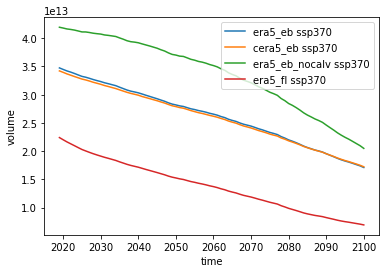

In [38]:
failed = set()
for exp in exps:
    rdir = '{}/cmip6_output/RGI{}/{}/'.format(exp, rgi_reg, gcm)
    all_ncs = glob.glob(rdir + '*.nc')
    for nc in sorted(all_ncs):
        ssp = os.path.basename(nc).split('_')[1].replace('.nc', '')
        if ssp != sel_ssp:
            continue
        with xr.open_dataset(nc) as ds:
            this_failed = ds.rgi_id[ds.volume.isel(time=-1).isnull()].data
            print(exp, 'n failed: ', len(this_failed))
            failed = failed.union(set(this_failed))

    all_ncs = glob.glob(rdir + '*.nc')
    for nc in sorted(all_ncs):
        ssp = os.path.basename(nc).split('_')[1].replace('.nc', '')
        if ssp != sel_ssp:
            continue
        with xr.open_dataset(nc) as ds:
            ds = ds.load()
            ds = ds.isel(rgi_id=~ds.rgi_id.isin(list(failed)))
            ds.volume.sum(dim='rgi_id').plot(label=exp + ' ' + ssp)
plt.legend();

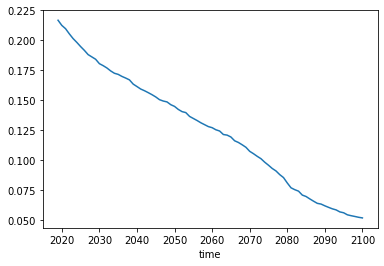

In [39]:
(ds.volume_bsl.sum(dim='rgi_id') / ds.volume.sum(dim='rgi_id')).plot();

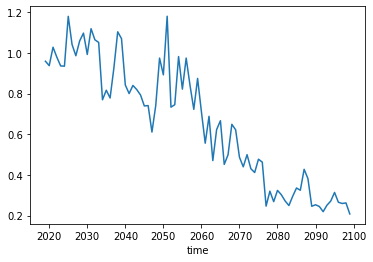

In [40]:
tot_vol = ds.volume.sum(dim='rgi_id')
tot_vol_c = tot_vol.data[1:] - tot_vol.isel(time=slice(0, -1))

tot_cal = ds.calving.sum(dim='rgi_id')
tot_cal_c = tot_cal.data[1:] - tot_cal.isel(time=slice(0, -1))

(tot_cal_c / - tot_vol_c).plot();

In [ ]:
ds.calving.sum(dim='rgi_id').plot();

In [ ]:
ds.isel(rgi_id=~ds.rgi_id.isin(list(failed)))

In [ ]:
ds.rgi_id.isin(list(failed)).sum()

In [ ]:
'era5_eb/cmip6_output/RGI11/CESM2/'

In [ ]:
all_ncs

In [ ]:
ssp